#Supervised Learning — Classification Models
In this section, we will train and evaluate different classification models on our heart disease dataset. These models will learn to predict the presence or severity of heart disease based on the selected features.

We will start by preparing the feature matrix and target vector, then fit models such as Logistic Regression, Random Forest, or others, and finally assess their performance.

#Data Preparation and Model Setup
In this step, we load the preprocessed dataset containing the selected and scaled features. We then split the data into training and testing sets using an 80-20 split. Stratified sampling is applied to preserve the distribution of the target classes in both sets.

Next, we import various classification algorithms and evaluation metrics to train and assess different models.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
df = pd.read_csv('/content/scaled_selected_features.csv')

X = df.drop('13', axis=1)
y = df['13']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Load Data and Split into Training and Testing Sets
Load the cleaned and scaled dataset with selected features.
Separate the features (X) from the target variable (y).
Split the data into training and testing sets using an 80/20 ratio.
Use stratified sampling to maintain the same class distribution in both sets.

Set a random seed for reproducibility.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Performance:
Accuracy: 0.5246
Precision: 0.5877
Recall: 0.5246
F1-score: 0.5525
AUC: 0.7494


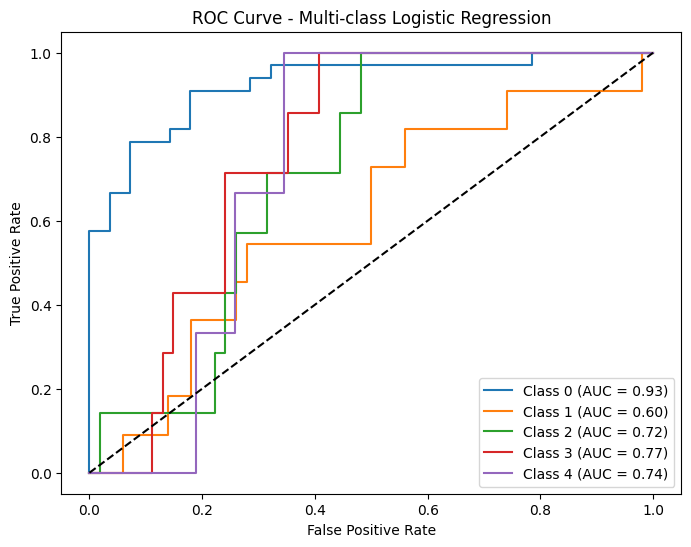

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr' , class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_proba = model.predict_proba(X_test)

auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')

print("Logistic Regression Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Logistic Regression')
plt.legend(loc='lower right')
plt.show()

#Decision Tree Classifier with Hyperparameter Tuning
Load the preprocessed dataset and split it into training and test sets.

Define a parameter grid to tune decision tree hyperparameters such as max depth, minimum samples split, minimum samples leaf, and criterion.

Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters optimizing for accuracy.

Train the decision tree with the best found parameters.

Evaluate model performance on the test set using accuracy, precision, recall, and F1-score.

For multi-class classification, compute and plot the ROC curve and AUC for each class.

Handle cases where the model might not support probability predictions needed for ROC curves.

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Performance After Tuning:
Accuracy: 0.4590
Precision: 0.4737
Recall: 0.4590
F1-score: 0.4653
AUC: 0.5446


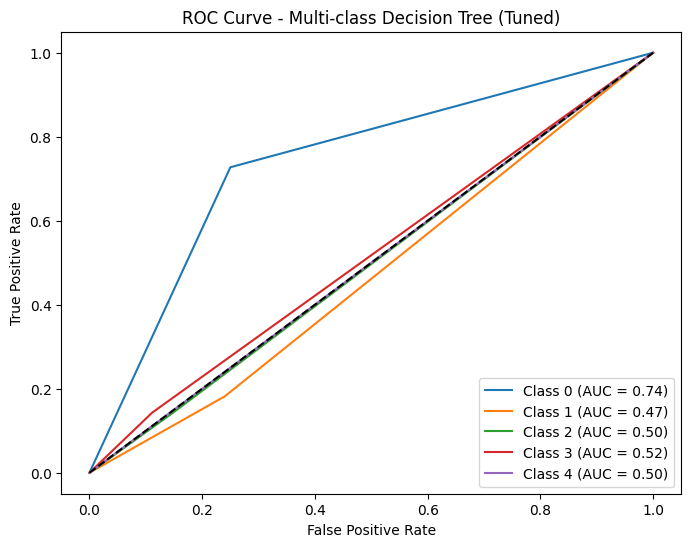

In [ ]:
df = pd.read_csv('/content/scaled_selected_features.csv')

X = df.drop('13', axis=1)
y = df['13']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']

}

tree = DecisionTreeClassifier(random_state=42 , class_weight='balanced')
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nDecision Tree Performance After Tuning:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

n_classes = len(np.unique(y))

y_test_bin = label_binarize(y_test, classes=np.unique(y))

if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)
else:
    y_proba = None
    print("Decision Tree does not support predict_proba for ROC calculation.")

if y_proba is not None:
    overall_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
    print(f"AUC: {overall_auc:.4f}")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multi-class Decision Tree (Tuned)')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("ROC Curve plotting is not available for this model.")

#Random Forest Classifier with Hyperparameter Tuning
Load the preprocessed dataset and split it into training and testing sets with stratification to maintain class balance.

Define a parameter grid for tuning hyperparameters such as number of trees (n_estimators), tree depth, minimum samples to split and leaf, and bootstrap usage.

Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters optimizing for accuracy.

Train the random forest model using the best parameters.

Predict on the test set and evaluate performance using accuracy, precision, recall, F1-score, and ROC AUC for multi-class classification.

Binarize the multi-class targets for ROC curve plotting.

Plot ROC curves for each class to visualize model performance.

🔧 Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Performance (Best Model):
Accuracy: 0.5738
Precision: 0.5823
Recall: 0.5738
F1-score: 0.5715
AUC: 0.7318


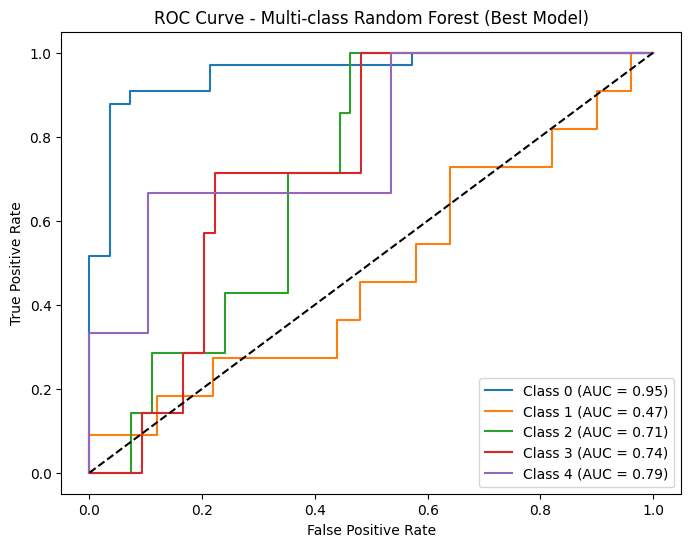

In [ ]:
df = pd.read_csv('/content/scaled_selected_features.csv')

X = df.drop('13', axis=1)
y = df['13']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42 , class_weight='balanced')
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("🔧 Best Parameters:", grid.best_params_)


y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_proba = best_model.predict_proba(X_test)
overall_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')

print("\nRandom Forest Performance (Best Model):")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {overall_auc:.4f}")

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Random Forest (Best Model)')
plt.legend(loc='lower right')
plt.show()

Check the distribution of target classes
This line prints the count of each class in the target variable y to understand how balanced or imbalanced the dataset is.

In [ ]:
print(y.value_counts())

Save target variable
This line saves the target variable y as a CSV file for later use or analysis.

In [ ]:
import os

# Create the directory if it doesn't exist
if not os.path.exists('../Data'):
    os.makedirs('../Data')

y.to_csv('../Data/supervised.csv', index=False)

In [ ]:
from google.colab import files

files.download('../Data/supervised.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>